### Import Libraries 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score

#formats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Dataset

In [2]:
df = pd.read_csv('/home/clivence/base_jupyter/Datadump/Master_data.csv')
df.head()


,datetime,open,high,low,close,25EMA,50EMA,75EMA,100EMA,125EMA,Ticker,Interval,Month,Month #,Year,Date,Primary_Key,Trend Status,Trend Status Enhanced,Spread,5075 Trend Status,75100 Trend Status,100125 Trend Status,Action,Opportunity,Order Type,Alerts,Index_Special,Alerts_Index,ROI Since Alert,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss
0,2020-12-10 19:00:00,1.21430,1.21605,1.21405,1.21580,1.215800,1.215800,1.215800,1.215800,1.215800,EUR/USD,4h,December,12,2020,2020-12-10 19:00:00,EUR/USD4h2020-12-10 19:00:00,Consolidating,NaN,0.000000,Bearish,Bearish,Bearish,NaN,Suboptimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-12-10 23:00:00,1.21585,1.21635,1.21260,1.21300,1.215585,1.215690,1.215726,1.215745,1.215756,EUR/USD,4h,December,12,2020,2020-12-10 23:00:00,EUR/USD4h2020-12-10 23:00:00,Bearish,Ultimate Bearish Trend,0.000106,Bearish,Bearish,Bearish,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-12-11 03:00:00,1.21300,1.21375,1.21105,1.21205,1.215313,1.215547,1.215630,1.215671,1.215697,EUR/USD,4h,December,12,2020,2020-12-11 03:00:00,EUR/USD4h2020-12-11 03:00:00,Bearish,Ultimate Bearish Trend,0.000235,Bearish,Bearish,Bearish,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-12-11 07:00:00,1.21225,1.21315,1.21055,1.21055,1.214946,1.215351,1.215496,1.215570,1.215615,EUR/USD,4h,December,12,2020,2020-12-11 07:00:00,EUR/USD4h2020-12-11 07:00:00,Bearish,Ultimate Bearish Trend,0.000405,Bearish,Bearish,Bearish,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-12-11 11:00:00,1.21070,1.21205,1.21070,1.21140,1.214674,1.215197,1.215388,1.215487,1.215548,EUR/USD,4h,December,12,2020,2020-12-11 11:00:00,EUR/USD4h2020-12-11 11:00:00,Bearish,Ultimate Bearish Trend,0.000523,Bearish,Bearish,Bearish,NaN,Optimal,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


### Data Cleaning

In [3]:
#Subset for trades
df = df[df['Alerts'] ==1] 
df = df[df['Action'] == 'Ultimate Action']
df = df[df['Ticker'] == 'GBP/USD']
df.fillna(0, inplace=True)


In [4]:
df.head()


,datetime,open,high,low,close,25EMA,50EMA,75EMA,100EMA,125EMA,Ticker,Interval,Month,Month #,Year,Date,Primary_Key,Trend Status,Trend Status Enhanced,Spread,5075 Trend Status,75100 Trend Status,100125 Trend Status,Action,Opportunity,Order Type,Alerts,Index_Special,Alerts_Index,ROI Since Alert,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss
4504,2020-12-14 07:00:00,1.34220,1.34450,1.33105,1.33180,1.332926,1.332362,1.332153,1.332044,1.331978,GBP/USD,4h,December,12,2020,2020-12-14 07:00:00,GBP/USD4h2020-12-14 07:00:00,Bullish,Ultimate Bullish Trend,0.000564,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,0.0,0,-8.39,1.32800,1.35540,0.00380,0.02360,1,0.0,0.0,0.0,0.0
4531,2020-12-20 15:00:00,1.34310,1.34430,1.33955,1.34000,1.348148,1.343490,1.340681,1.338919,1.337726,GBP/USD,4h,December,12,2020,2020-12-20 15:00:00,GBP/USD4h2020-12-20 15:00:00,Bullish,Ultimate Bullish Trend,0.004658,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,0.0,0,-8.95,1.31895,1.34945,0.02105,0.00945,1,0.0,0.0,0.0,0.0
4538,2020-12-21 19:00:00,1.34480,1.34570,1.34045,1.34100,1.343426,1.341842,1.339988,1.338609,1.337597,GBP/USD,4h,December,12,2020,2020-12-21 19:00:00,GBP/USD4h2020-12-21 19:00:00,Bullish,Ultimate Bullish Trend,0.001583,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,0.0,0,-9.02,1.33050,1.35690,0.01050,0.01590,1,0.0,0.0,0.0,0.0
4540,2020-12-22 03:00:00,1.34325,1.34495,1.33675,1.34115,1.343245,1.341872,1.340105,1.338752,1.337743,GBP/USD,4h,December,12,2020,2020-12-22 03:00:00,GBP/USD4h2020-12-22 03:00:00,Bullish,Ultimate Bullish Trend,0.001373,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,0.0,0,-9.03,1.33050,1.36195,0.01065,0.02080,1,0.0,0.0,0.0,0.0
4565,2020-12-28 07:00:00,1.34920,1.35365,1.34290,1.34520,1.351233,1.348093,1.345580,1.343634,1.342126,GBP/USD,4h,December,12,2020,2020-12-28 07:00:00,GBP/USD4h2020-12-28 07:00:00,Bullish,Ultimate Bullish Trend,0.003139,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,0.0,0,-9.30,1.34325,1.36180,0.00195,0.01660,1,0.0,0.0,0.0,0.0


In [5]:
#Subset of features to keep
df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA','100EMA', '125EMA',
        'Trend Status', 'Spread','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type','2D Lowest Price',
       '2D Highest Price', '2D Low in Pips', '2D High in Pips',
       '2D Trade Status', '2D Hard Stop Price', '2D Hard Stop Loss',
       '2D Trend Change Stop Price', '2D Trend Change Stop Loss']]

In [6]:
#Apply one-hot encoding 
df= pd.get_dummies(df,columns=['Trend Status','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type'])

In [7]:
df.head(20)

,open,high,low,close,25EMA,50EMA,75EMA,100EMA,125EMA,Spread,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss,Trend Status_Bearish,Trend Status_Bullish,5075 Trend Status_Bearish,5075 Trend Status_Bullish,75100 Trend Status_Bearish,75100 Trend Status_Bullish,100125 Trend Status_Bearish,100125 Trend Status_Bullish,Action_Ultimate Action,Opportunity_Optimal,Opportunity_Unfavorable,Order Type_BUY,Order Type_SELL
4504,1.34220,1.34450,1.33105,1.33180,1.332926,1.332362,1.332153,1.332044,1.331978,0.000564,1.32800,1.35540,0.00380,0.02360,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4531,1.34310,1.34430,1.33955,1.34000,1.348148,1.343490,1.340681,1.338919,1.337726,0.004658,1.31895,1.34945,0.02105,0.00945,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4538,1.34480,1.34570,1.34045,1.34100,1.343426,1.341842,1.339988,1.338609,1.337597,0.001583,1.33050,1.35690,0.01050,0.01590,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4540,1.34325,1.34495,1.33675,1.34115,1.343245,1.341872,1.340105,1.338752,1.337743,0.001373,1.33050,1.36195,0.01065,0.02080,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4565,1.34920,1.35365,1.34290,1.34520,1.351233,1.348093,1.345580,1.343634,1.342126,0.003139,1.34325,1.36180,0.00195,0.01660,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4596,1.36705,1.36705,1.35620,1.35770,1.363155,1.358448,1.354808,1.351945,1.349660,0.004707,1.35390,1.36710,0.00380,0.00940,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4600,1.35855,1.36120,1.35620,1.35710,1.361565,1.358284,1.355063,1.352359,1.350136,0.003281,1.35390,1.36710,0.00320,0.01000,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4608,1.36505,1.36540,1.35390,1.35510,1.361420,1.359101,1.356255,1.353676,1.351473,0.002319,1.35330,1.36360,0.00180,0.00850,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4612,1.36015,1.36095,1.35655,1.35815,1.361051,1.359251,1.356647,1.354172,1.352010,0.001800,1.34975,1.36360,0.00840,0.00545,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False
4651,1.36395,1.36420,1.35725,1.35845,1.363191,1.361277,1.359596,1.357810,1.356042,0.001914,1.35205,1.36270,0.00640,0.00425,1,0.00000,0.00000,0.00000,0.00000,False,True,False,True,False,True,False,True,True,True,False,True,False


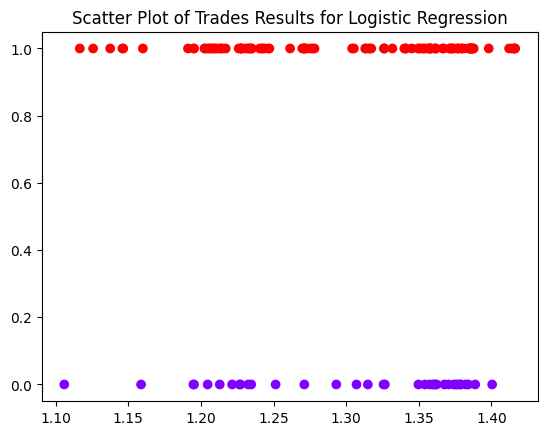

In [8]:
#Create a scatter plot of the target variable 
plt.scatter(x=df['close'],y=df['2D Trade Status'], c=df['2D Trade Status'], cmap='rainbow')
plt.title('Scatter Plot of Trades Results for Logistic Regression')
plt.show()

In [9]:
df['2D Trade Status'].value_counts()

2D Trade Status
1    106
0     36
Name: count, dtype: int64

### Split Data: Training & Test Data

In [10]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D Trade Status'] 

In [11]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### Algoritm Selection 

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

### Evaluate Results 

In [13]:
accuracy = accuracy_score(Y_test,Y_pred)
classification_rep =classification_report(Y_test,Y_pred)

print(f"Accuracy:", accuracy)
print(f"\nClassfication Report:\n",classification_rep )

Accuracy: 0.8620689655172413

Classfication Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      1.00      0.93        25

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29



/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Displaying using confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[ 0,  4],
       [ 0, 25]])

## Gradient Boosting Model 


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=25, learning_rate=.25,max_depth=1, random_state=42).fit(X_train, Y_train)



In [17]:
gbc.score(X_test, Y_test)

0.7586206896551724

## DecisionTree Classifier 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [19]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=42)


In [20]:
scores = cross_val_score(DecisionTreeClassifier(),X,Y,cv=10)

In [21]:
scores

array([0.53333333, 0.6       , 0.07142857, 0.35714286, 0.28571429,
       0.21428571, 0.21428571, 0.42857143, 0.64285714, 0.71428571])

In [22]:
scores.mean()

0.40619047619047616

## Bagging Classifier 

## Bagging Classifier & Decision Trees

In [23]:
from sklearn.ensemble import BaggingClassifier

In [32]:
basic_bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

In [25]:
basic_bag_model.fit(X_train,Y_train)

/home/clivence/base_jupyter/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [26]:
basic_bag_model.oob_score_

0.672566371681416

In [27]:
basic_bag_model.score(X_test,Y_test)

0.6896551724137931

## Bagging Classifier & Gradient Boosting 

In [39]:
basic_bag_model = BaggingClassifier(
    estimator=GradientBoostingClassifier(n_estimators=25, learning_rate=.1,max_depth=1, random_state=42),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

basic_bag_model.score(X_test,Y_test)



0.7586206896551724